# Logistic Regression

---

# $$ h(x_i, θ) = \frac{1}{1 + e^{-θ^Tx_i}}  $$

---


In Linear Regresssion, the output is the weighted sum of inputs.
*   Linear Regression Equation: $ h(x) = θ^T x =\theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... \theta_m x_m$
*   Input featues vector for a single sequence: $ x_i $
*   Weights vector: $ θ$

In Logistic Regression, we pass the Linear Regression output through a sigmoid function, that can map any real value between 0 and 1.
*   Sigmoid function: $ σ(x) = \frac{1}{1 + e^{-x}}  $
*   Logistic Regression Equation: $ h(x_i) = σ( θ^T x_i)= \left\{\begin{matrix}
 \geq 0.5, & if & \theta^Tx_i > 0
 \\< 0.5, & if & \theta^Tx_i <  0
\end{matrix}\right. $







In [2]:
import numpy as np

def sigmoid(X, theta):
    """
    Sigmoid function for logistic regression

    :param X: input features. Numpy array of shape (m, n+1) (m=number of input sequences, n=number of features + 1 for bias)
    :param theta: weights vector. Numpy array of shape (n+1, 1)
    :return: logistic regression over X. Numpy array of shape (m, 1)
    """
    return 1.0 / (1.0 + np.exp(-np.dot(X, theta)))

# Cost function: log loss

Log loss for a single training example:
$$Loss = -1\cdot[{\color{DarkGreen} {y_i \cdot log(p_i)}} + {\color{Red} {(1-y_i)\cdot log(1-p_i)}}] $$
* Gold label: $y_i$
* Predicted probability for seq $x_i$ (between 0 and 1): $h(x_i, θ)$ => The logs will be negative (we add a small value to avoid log(0)):
$\left\{\begin{matrix} log(0.0001)=-4 \\
 log(0.5)=-0.3\\
 log(1)=0
\end{matrix}\right. $

* First term: probability of 1: ${\color{DarkGreen} {p_i = h(x_i, \theta)}}$
* Second term: probability of 0: ${\color{Red} {1-p_i=1-h(x_i, \theta)}}$


\begin{vmatrix}
 y_i & 
 {\color{DarkGreen}{p_i}} & 
 log({\color{DarkGreen}{p_i}}) & 
 y_i⋅log({\color{DarkGreen}{p_i}}) & 
 {\color{Red} {1-p_i}} &
 log({\color{Red} {1-p_i}}) & 
 (1-y_i)⋅log({\color{Red} {1-p_i}}) & 
 y_i⋅log({\color{DarkGreen}{p_i}}) + (1-y_i)⋅log({\color{Red} {1-p_i}}) & 
 loss   \\
{\color{DarkGreen}1}&{\color{DarkGreen}{0.9999}}&\sim0&\sim0&0.0001&-4&0&\sim0&\sim0\\
{\color{DarkGreen}1}&{\color{Red}{0.0001}}&-4&-4&0.9999&\sim0&0&-4&4\\
{\color{Red}0}&{\color{DarkGreen}{0.9999}}&\sim0&\sim0&0.0001&-4&-4&-4&4\\
{\color{Red}0}&{\color{Red}{0.0001}}&-4&0&0.9999&\sim0&\sim0&\sim
0&\sim0\\
\end{vmatrix}


The cost function used for logistic regression is the average of the log loss across all training examples:

$$J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}[{\color{DarkGreen} {y_i \cdot log(h(x_i, \theta))}} + {\color{Red} {(1-y_i)\cdot log(1-h(x_i, \theta))}}] $$
* Number of training examples: $m$


In [3]:
def cost(Y_prob, Y):
    """
    Compute the log loss between predicted labels and gold labels

    :param Y_prob: predicted probabilities. Numpy array of shape (m, 1) (m= number of labels)
    :param Y: true labels. Numpy array of shape (m, 1)
    :return: cost value (float)
    """
    return float(-(np.dot(Y.T, np.log(Y_prob)) + np.dot((1-Y).T, np.log(1 - Y_prob)))/Y.shape[0])


# Weights update: Gradient descent

We update the weight $\theta_j$ by subtracting a fraction of the gradient determined by $\alpha$: $\left\{\begin{matrix}
\theta_j = \theta_j - \alpha \times \nabla_{\theta_j}J(\theta) \\
\nabla_{\theta_j}J(\theta) = \frac{1}{m} \sum_{i=1}^m(h_i-y_i)x_j 
\end{matrix}\right. $
* $i$ is the index across all $m$ training examples.
* $j$ is the index of the weight $\theta_j$, so $x_j$ is the feature associated with weight $\theta_j$

---
$$\mathbf{\theta} = \mathbf{\theta} - \frac{\alpha}{m} \times \left( \mathbf{X}^T \cdot \left( \mathbf{Y_{prob}-Y} \right) \right)$$

---

* weights vector: $θ$, with dimensions $(n+1, 1)$
* lerning rate: $α$
* number of training examples: $m$
* training examples: $X$, with dimensions $(m, n+1)$
* training labels: $Y$, with dimensions $(m, 1)$
* predicted labels (probabilities): $Y_{prob}$

In [4]:
def gradient_descent(X, Y, Y_prob, theta, alpha):
    """
    Update the weights vector

    :param X: training features. Numpy array of shape (m, n+1) (m=number of training sequences, n=number of features + 1 for bias)
    :param Y: training labels. Numpy array of shape (m, 1)
    :param Y_prob: predicted probabilities. Numpy array of shape (m, 1)
    :param theta: weights vector. Numpy array of shape (n+1, 1)
    :param alpha: learning rate. Float
    :return: updated weight vector
    """
    return theta - alpha/ X.shape[0] * np.dot(X.T, Y_prob-Y) 

# Data preprocessing

In [5]:
import nltk
import string
import matplotlib.pyplot as plt
from nltk.corpus import sentence_polarity, stopwords
from nltk.stem import WordNetLemmatizer

# Download nltk resources
nltk.download("sentence_polarity")
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package sentence_polarity to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package sentence_polarity is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
# Import dataset
pos_ids = sentence_polarity.fileids('pos')
neg_ids = sentence_polarity.fileids('neg')
pos_sentences = sentence_polarity.sents(pos_ids)
neg_sentences = sentence_polarity.sents(neg_ids)
pos_sentences, len(pos_sentences), len(neg_sentences), 

([['the', 'rock', 'is', 'destined', 'to', 'be', 'the', '21st', "century's", 'new', '"', 'conan', '"', 'and', 'that', "he's", 'going', 'to', 'make', 'a', 'splash', 'even', 'greater', 'than', 'arnold', 'schwarzenegger', ',', 'jean-claud', 'van', 'damme', 'or', 'steven', 'segal', '.'], ['the', 'gorgeously', 'elaborate', 'continuation', 'of', '"', 'the', 'lord', 'of', 'the', 'rings', '"', 'trilogy', 'is', 'so', 'huge', 'that', 'a', 'column', 'of', 'words', 'cannot', 'adequately', 'describe', 'co-writer/director', 'peter', "jackson's", 'expanded', 'vision', 'of', 'j', '.', 'r', '.', 'r', '.', "tolkien's", 'middle-earth', '.'], ...],
 5331,
 5331)

In [7]:
# Split train/test
train_pos, train_neg = pos_sentences[:4500], neg_sentences[:4500]
test_pos, test_neg = pos_sentences[4500:], neg_sentences[4500:]
train_sentences  = train_pos + train_neg
test_sentences = test_pos + test_neg
len(train_sentences), len(test_sentences)

(9000, 1662)

In [8]:
# Create sentiment labels
Y_train = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
Y_test = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)
Y_train.shape, Y_test.shape

((9000, 1), (1662, 1))

In [9]:
def process_sentence(sentence):  
    """
    Remove stopwords, punctuations and lemmatize

    :param sentence: Input sentence (String)
    :return: tokenized sentence (list)
    """ 
    stopwords_eng = stopwords.words("english")
    lemmatizer = WordNetLemmatizer()
    clean_sentence = [lemmatizer.lemmatize(token) for token in sentence if token not in stopwords_eng and token not in string.punctuation]
    return clean_sentence

In [10]:
def create_word_freqs_dict(sentences, labels):
    """
    Create frequencies dictionary

    :param sentences: list of sentences
    :param labels: list of sentences' labels (0 or 1)
    :return: vocabulary frequencies dictionary
    """
    tok_sentences = [process_sentence(sentence) for sentence in sentences]
    word_freqs = {}
    for sentence, label in zip(tok_sentences, labels):
        for word in sentence:
            if not (word, label[0]) in word_freqs:
                word_freqs[(word, label[0])] = 0
            word_freqs[(word, label[0])] += 1

    sorted_word_freq = sorted(word_freqs.items(), key=lambda x:x[1], reverse=True)
    for item in sorted_word_freq[:10]:
        print(item)
    # return dictionary sorted by values 
    return dict(sorted_word_freq)

In [11]:
vocab_dict = create_word_freqs_dict(train_sentences, Y_train)

(('film', 1.0), 771)
(('movie', 0.0), 728)
(('film', 0.0), 601)
(('movie', 1.0), 528)
(('like', 0.0), 377)
(('one', 0.0), 313)
(('one', 1.0), 307)
(('--', 0.0), 269)
(('--', 1.0), 267)
(('make', 1.0), 252)


In [12]:
def extract_freq_feature(sentences, vocab):
    """
    Create frequency features vector for each sequence

    :param sentences: input sentences (list of strings)
    :param vocab: vocabulary frequencies dictionary
    :return: numpy array of frequency freatures vectors
    """
    freq_feature = []
    for sentence in sentences:
        sentence = process_sentence(sentence)
        pos = 0
        neg = 0
        # Ignore repeated words
        for word in list(set(sentence)):
            pos += vocab.get((word, 1), 0)
            neg += vocab.get((word, 0), 0)
        # Add 1 for bias
        freq_feature.append([1, pos, neg])
    return np.array(freq_feature)

In [13]:
# Extract frequency features for train and test set
X_train = extract_freq_feature(train_sentences, vocab_dict)
X_test = extract_freq_feature(test_sentences, vocab_dict)
X_train, X_train.shape

(array([[   1,  618,  582],
        [   1,  121,   84],
        [   1,   25,    7],
        ...,
        [   1,  947, 1080],
        [   1,  225,  218],
        [   1,    7,   25]]), (9000, 3))

Text(0, 0.5, 'Negative')

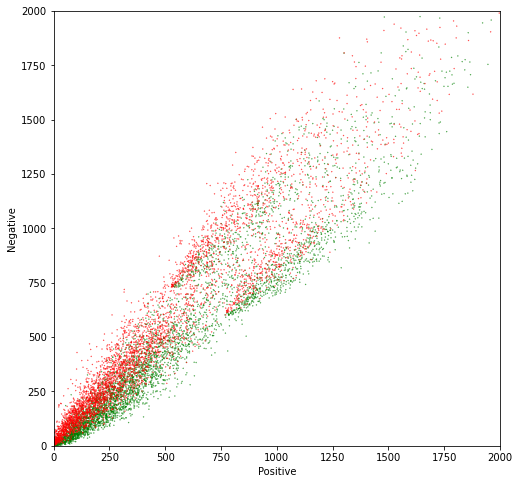

In [14]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (8,8))
plt.ylim(0, 2000)
plt.xlim(0, 2000)

colors = ['red', 'green']

# Color based on the sentiment Y
ax.scatter(X_train[:,1], X_train[:,2], c=[colors[int(k)] for k in Y_train], s = 0.1)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

# Training the classifier

In [21]:
def train(X, Y, theta, alpha, num_iters):  
    """
    Train the logistic regression classifier on the provided X sequences

    :param X: training features. Numpy array of shape (m, n+1) (m=number of training sequences, n=number of features + 1 for bias)
    :param Y: training labels. Numpy array of shape (m, 1)
    :param theta: weights vector. Numpy array of shape (n+1, 1)
    :param alpha: learning rate (float)
    :param num_iters: number of training iterations (int)
    :return: training cost and weights vector
    """  
    for i in range(num_iters):
        Y_prob = sigmoid(X, theta) #Prob for list of sequences
        J = cost(Y_prob, Y)
        theta = gradient_descent(X, Y, Y_prob, theta, alpha)
    return J, theta

In [16]:
J, theta = train(X_train, Y_train, np.zeros((X_train.shape[1],1)), 5e-6, 500)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

The cost after training is 0.61180369.
The resulting vector of weights is [-1.138e-05, 0.00663736, -0.00655337]


# Evaluating the model

In [17]:
def predict(X, theta):
    """
    Predict polarity labels for the input sequences X (0=Negative, 1=Positive)

    :param X: input sequences. Numpy array of features with shape (m, n+1) (m=number of input sequences, n=number of features + 1 for bias)
    :param theta: weights vector. Numpy array of shape (n+1, 1)                                                                        
    :return: predicted labels. Numpy array of size (m, 1)
    """
    return np.array([1 if sigmoid(x, theta) >= 0.5 else 0 for x in X])

In [18]:
# Accuracy = number of correct predicions / total number of predictions
def evaluate_accuracy(Y_gold, Y_pred):
    """
    Evaluate accuracy of the predictions

    :param Y_gold: actual labels. Numpy array of size (m, 1) (m=number of labels)
    :param Y_pred: predicted labels. Numpy array of size m
    :return: accuracy value (int)
    """
    return sum([1 for y_gold, y_pred in zip(Y_gold, Y_pred) if y_gold==y_pred]) / len(Y_pred)

In [19]:
Y_pred = predict(X_test, theta)
Y_pred

array([1, 0, 1, ..., 1, 0, 0])

In [20]:
evaluate_accuracy(Y_test, Y_pred)

0.6726835138387485

In [26]:
# Visualize some test sentences and their classification
for sentence, label, pred_label in zip(test_sentences[826:836], Y_test[826:836], Y_pred[826:836]):
    print(" ".join(sentence))
    print(f"Predicted label: {pred_label} ------- True label: {int(label[0])}")
    print()

both exuberantly romantic and serenely melancholy , what time is it there ? may prove to be [tsai's] masterpiece .
Predicted label: 1 ------- True label: 1

mazel tov to a film about a family's joyous life acting on the yiddish stage .
Predicted label: 1 ------- True label: 1

standing in the shadows of motown is the best kind of documentary , one that makes a depleted yesterday feel very much like a brand-new tomorrow .
Predicted label: 0 ------- True label: 1

it's nice to see piscopo again after all these years , and chaykin and headly are priceless .
Predicted label: 1 ------- True label: 1

provides a porthole into that noble , trembling incoherence that defines us all .
Predicted label: 1 ------- True label: 1

the whole mess boils down to a transparently hypocritical work that feels as though it's trying to set the women's liberation movement back 20 years .
Predicted label: 0 ------- True label: 0

' . . . the cast portrays their cartoon counterparts well . . . but quite frankl